# Ensembles and random forest
## [Random Forest](https://mlcourse.ai/book/topic05/topic5_part2_random_forest.html)


## Libraries

In [30]:
# Disable warnings in Anaconda
#import warnings
#w1arnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib. pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'retina'

## Methods

In [3]:
# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [4]:
def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

## Generating data

In [5]:
n_train = 150  
n_test = 1000  
noise = 0.1

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

## Modeling

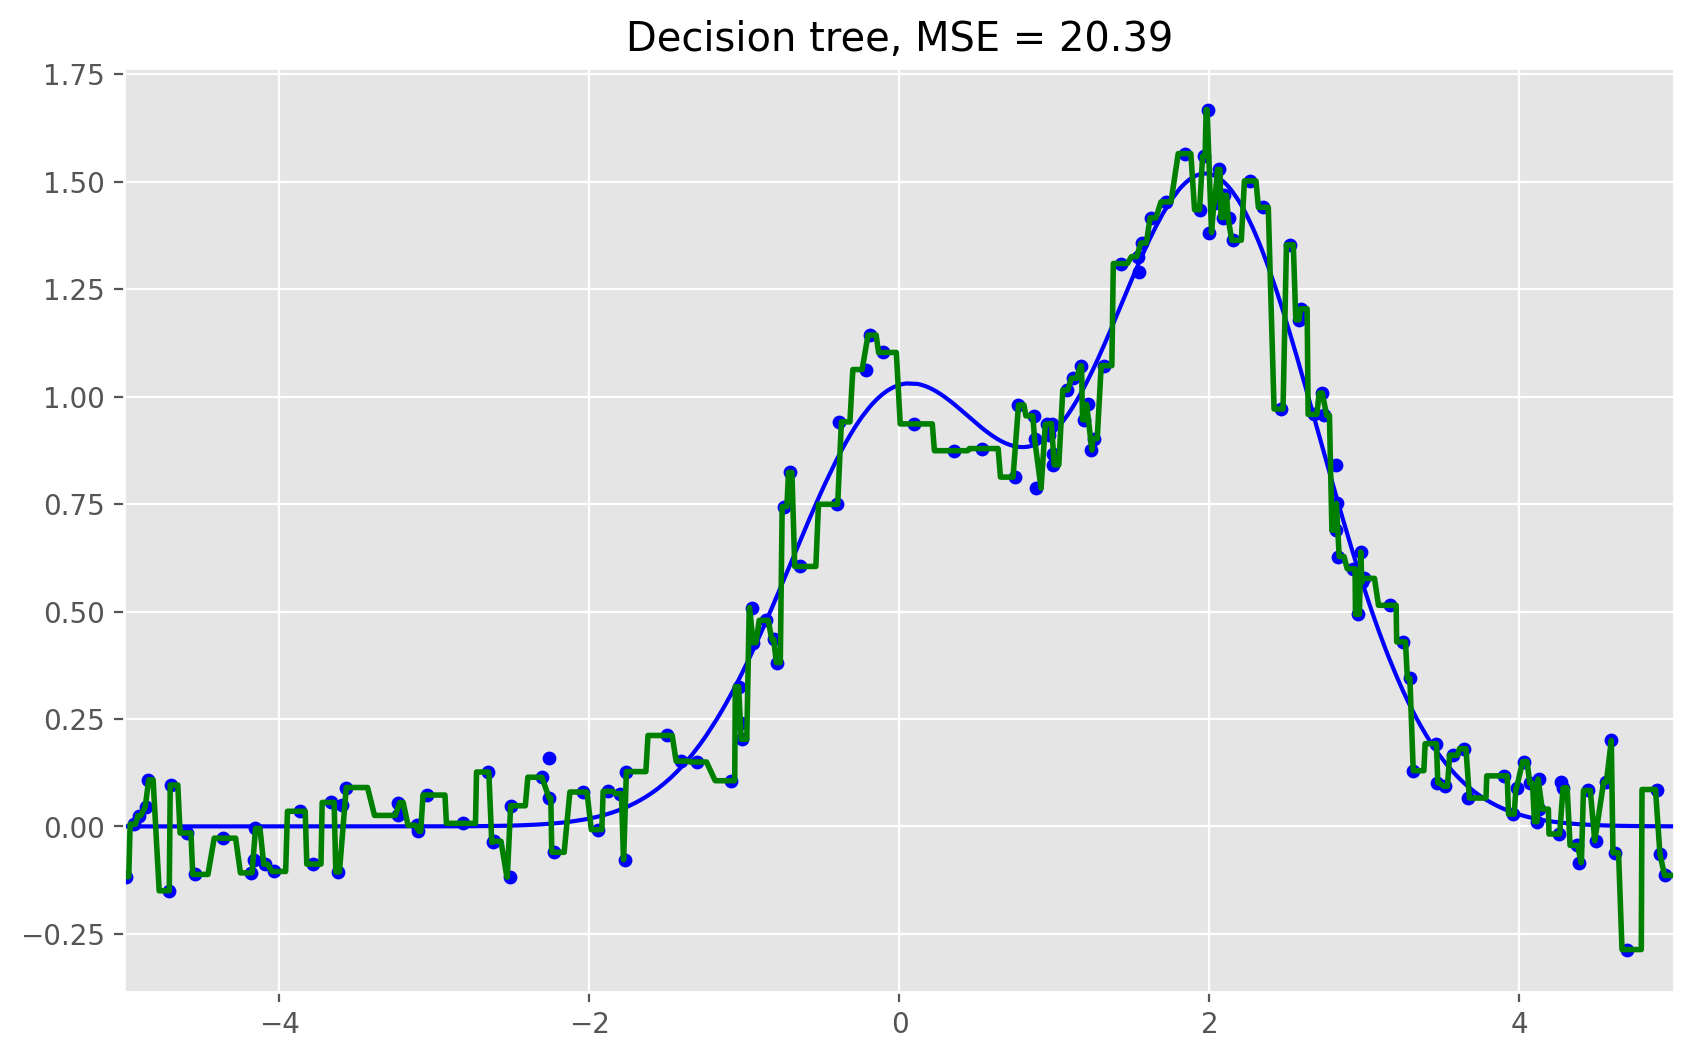

In [21]:
# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))
plt.show()

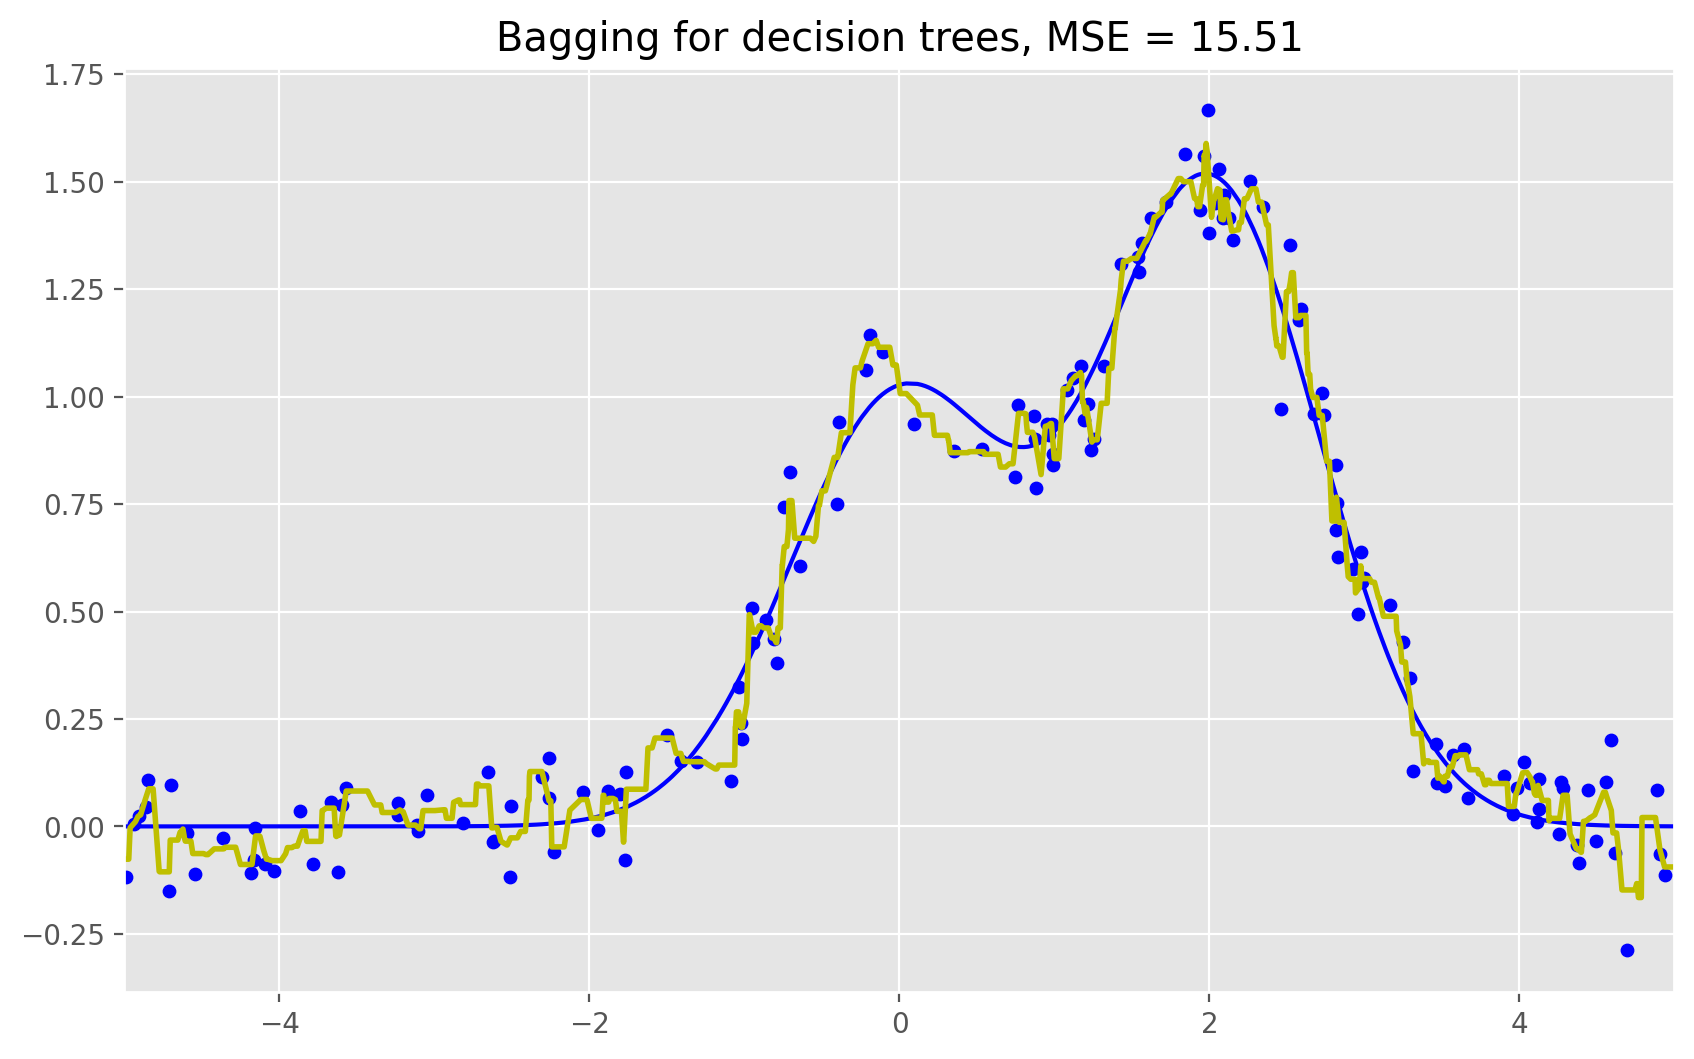

In [22]:
# Bagging with a decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Bagging for decision trees, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2))
plt.show()

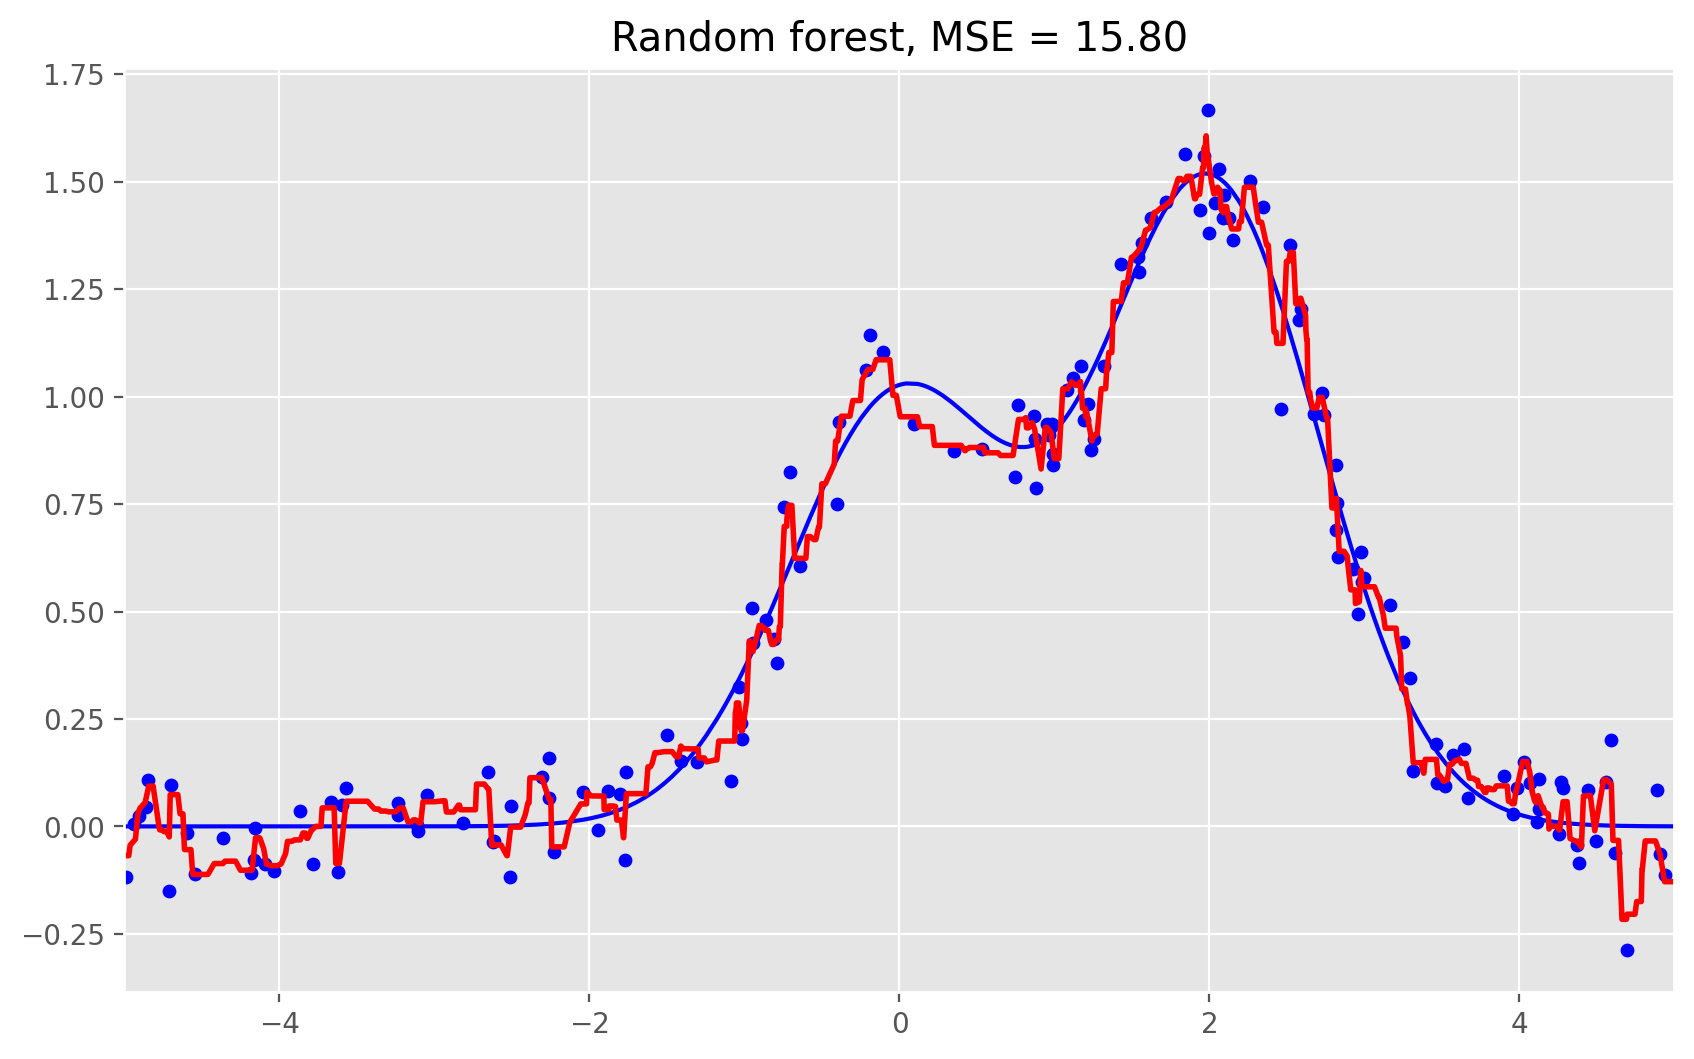

In [23]:
# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2))
plt.show()

As we can see from our graphs and the MSE values above, a random forest of 10 trees achieves a better result than a single decision tree and is comparable to bagging with 10 trees.

The main difference between random forests and bagging is that, in a random forest, the best feature for a split is selected from a random subset of the available features while, in bagging, all features are considered for the next best split.

We can also look at the advantages of random forests and bagging in classification problems:

In [12]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

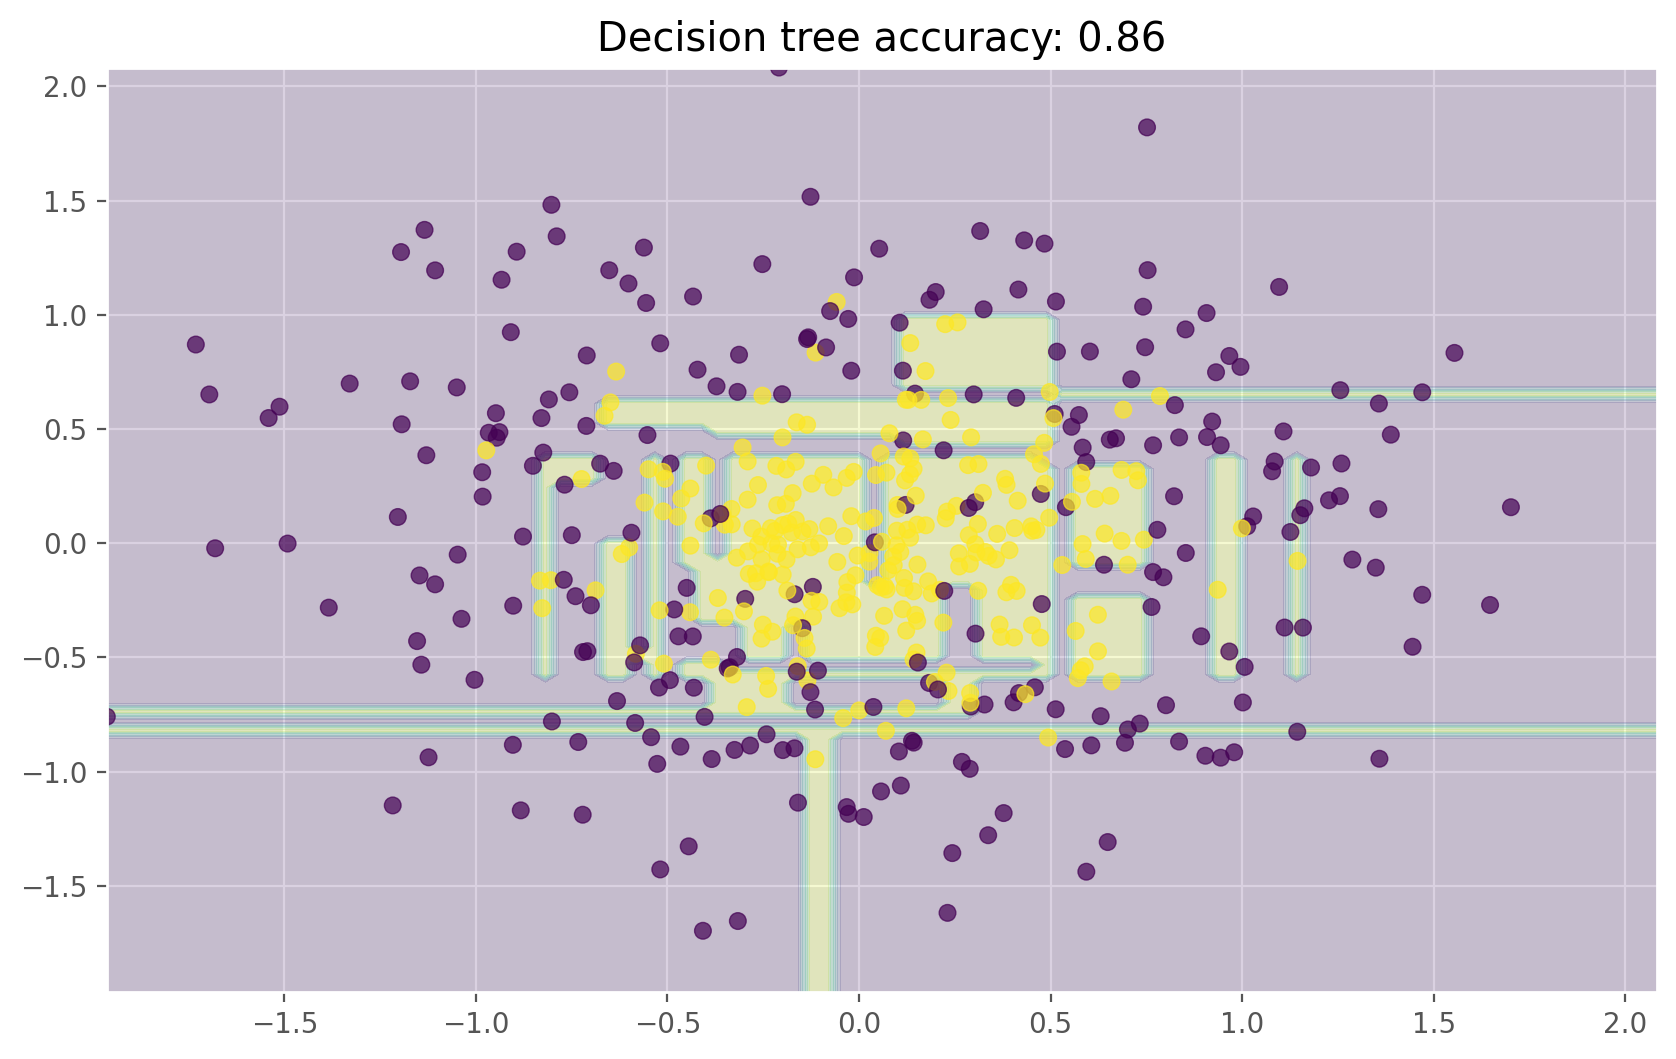

In [26]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)
dtree_predict = dtree.predict(X_test_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title(f"Decision tree accuracy: {accuracy_score(y_test_circles, dtree_predict)}")
plt.show()

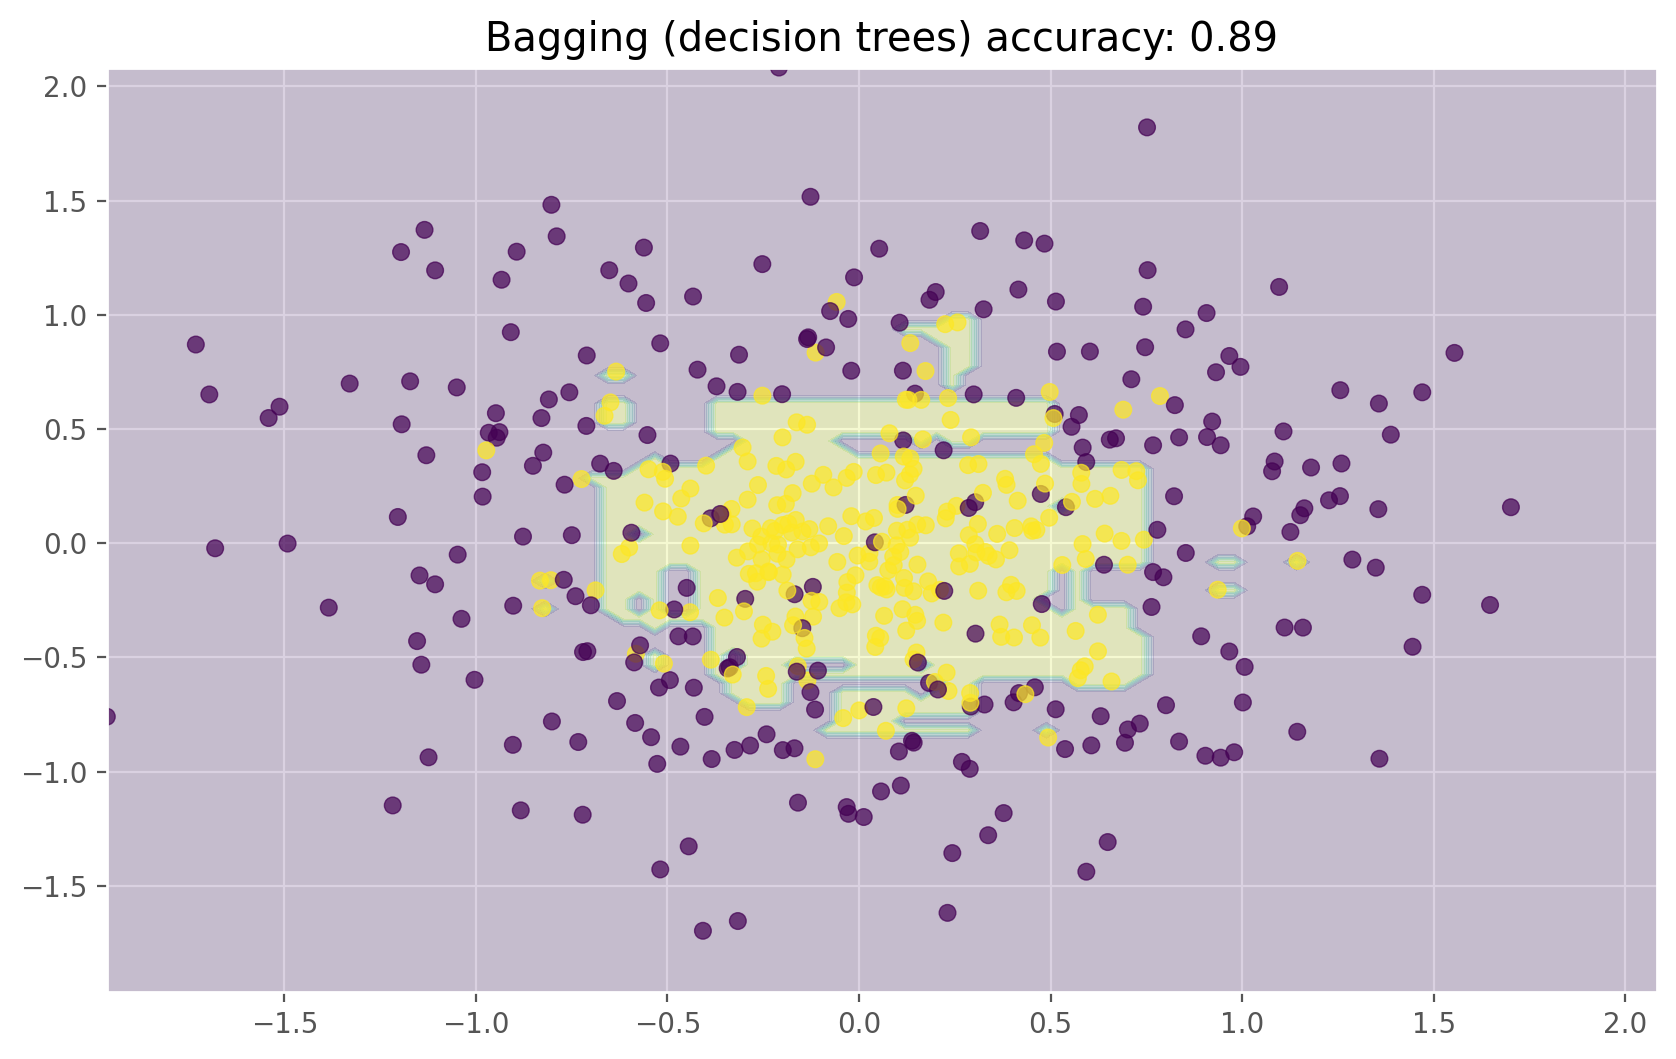

In [28]:
b_dtree = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)
b_dtree_predict = b_dtree.predict(X_test_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title(f"Bagging (decision trees) accuracy: {accuracy_score(y_test_circles, b_dtree_predict)}")
plt.show()

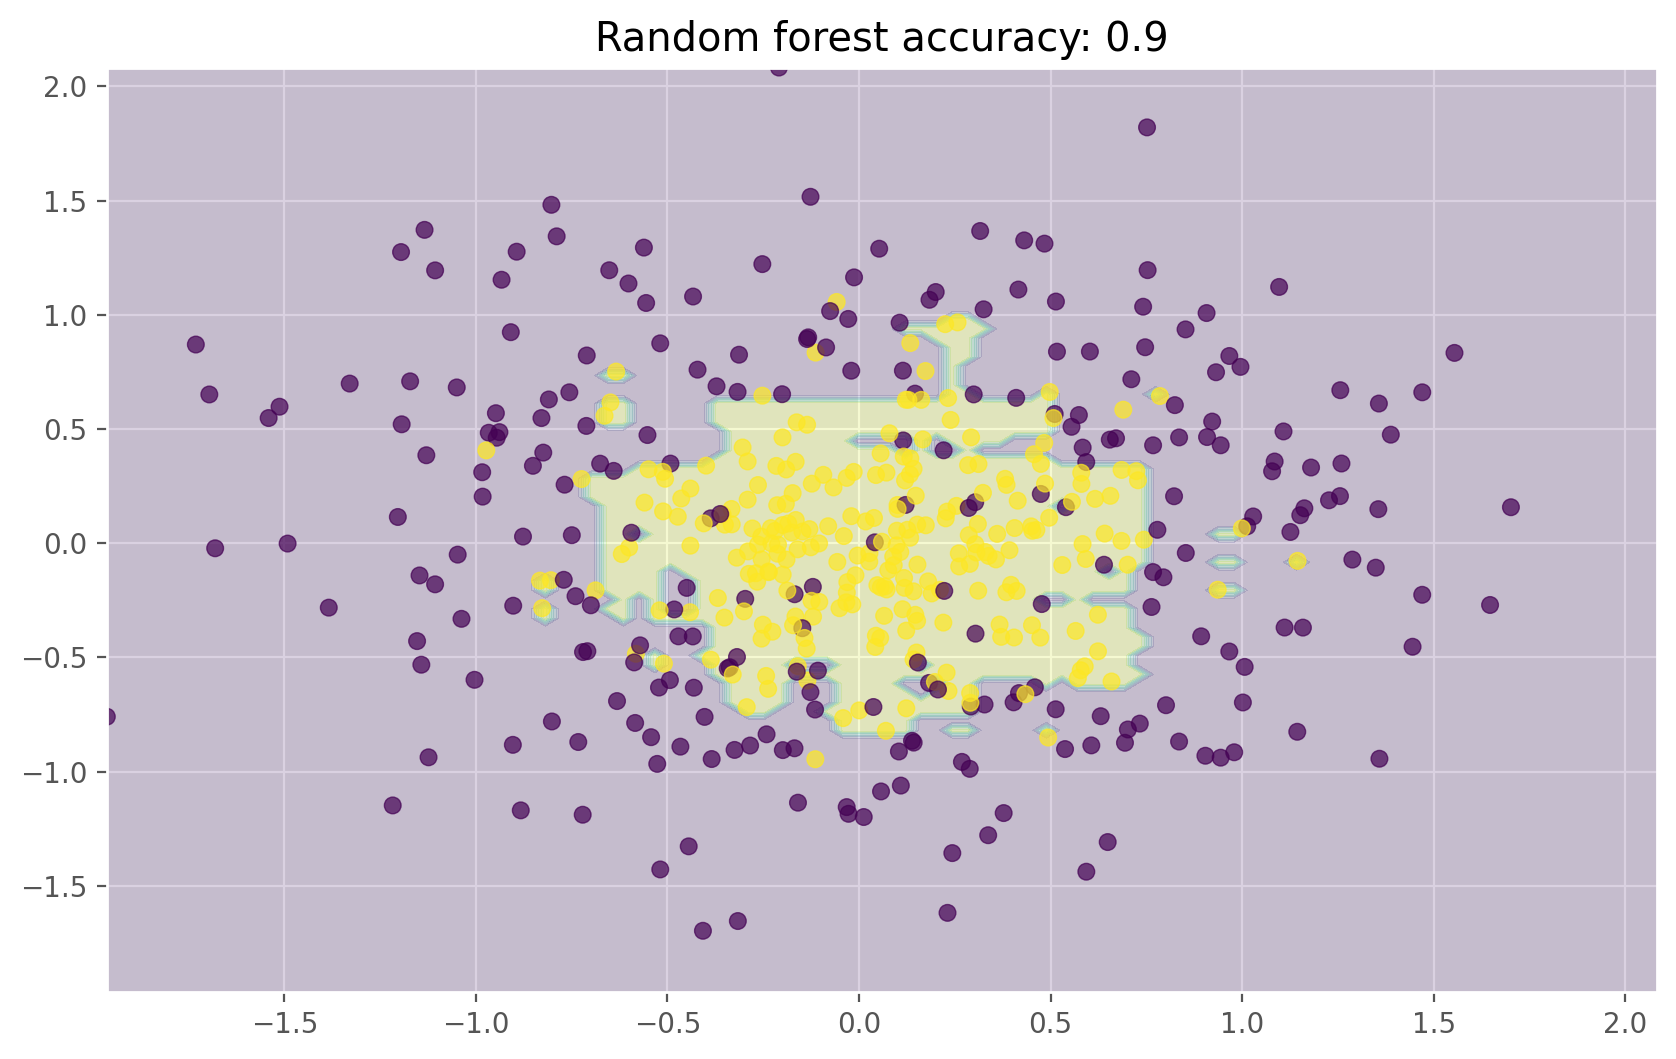

In [29]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)
rf_predict = rf.predict(X_test_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title(f"Random forest accuracy: {accuracy_score(y_test_circles, rf_predict)}")
plt.show()

The figures above show that the decision boundary of the decision tree is quite jagged and has a lot of acute angles that suggest overfitting and a weak ability to generalize. We would have trouble making reliable predictions on new test data. In contrast, the bagging algorithm has a rather smooth boundary and has no obvious signs of overfitting.

Now, let’s investigate some parameters which can help us increase the model accuracy.

In [31]:
# Load data
df = pd.read_csv("../../data/telecom-churn.csv")

In [33]:
# Choose the numeric features
cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)

In [34]:
# Divide the dataset into the input and target
X, y = df[cols].copy(), np.asarray(df["Churn"],dtype='int8')

In [35]:
# Initialize a stratified split of our dataset for the validation process
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Initialize the classifier with the default parameters
rfc = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Train it on the training set
results = cross_val_score(rfc, X, y, cv=skf)

# Evaluate the accuracy on the test set
print("CV accuracy score: {:.2f}%".format(results.mean() * 100))

CV accuracy score: 92.50%


Now, let’s try to improve this result, and take a look at the behavior of the learning curves when we change the basic parameters.

Let’s start with the number of trees:

In [36]:
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Initialize the validation
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []

for ntrees in trees_grid:
    
    rfc = RandomForestClassifier(
        n_estimators=ntrees,
        random_state=42,
        n_jobs=-1
    )
    
    temp_train_acc = []
    temp_test_acc = []
    
    for train_index, test_index in skf.split(X, y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        rfc.fit(X_train, y_train)
        
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
        
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc  = np.asarray(train_acc)
test_acc = np.asarray(test_acc)

print(
    f"Best CV accuracy is {max(test_acc.mean(axis=1))*100:.2f}% with {trees_grid[np.argmax(test_acc.mean(axis=1))]} trees"
)

Best CV accuracy is 92.50% with 100 trees


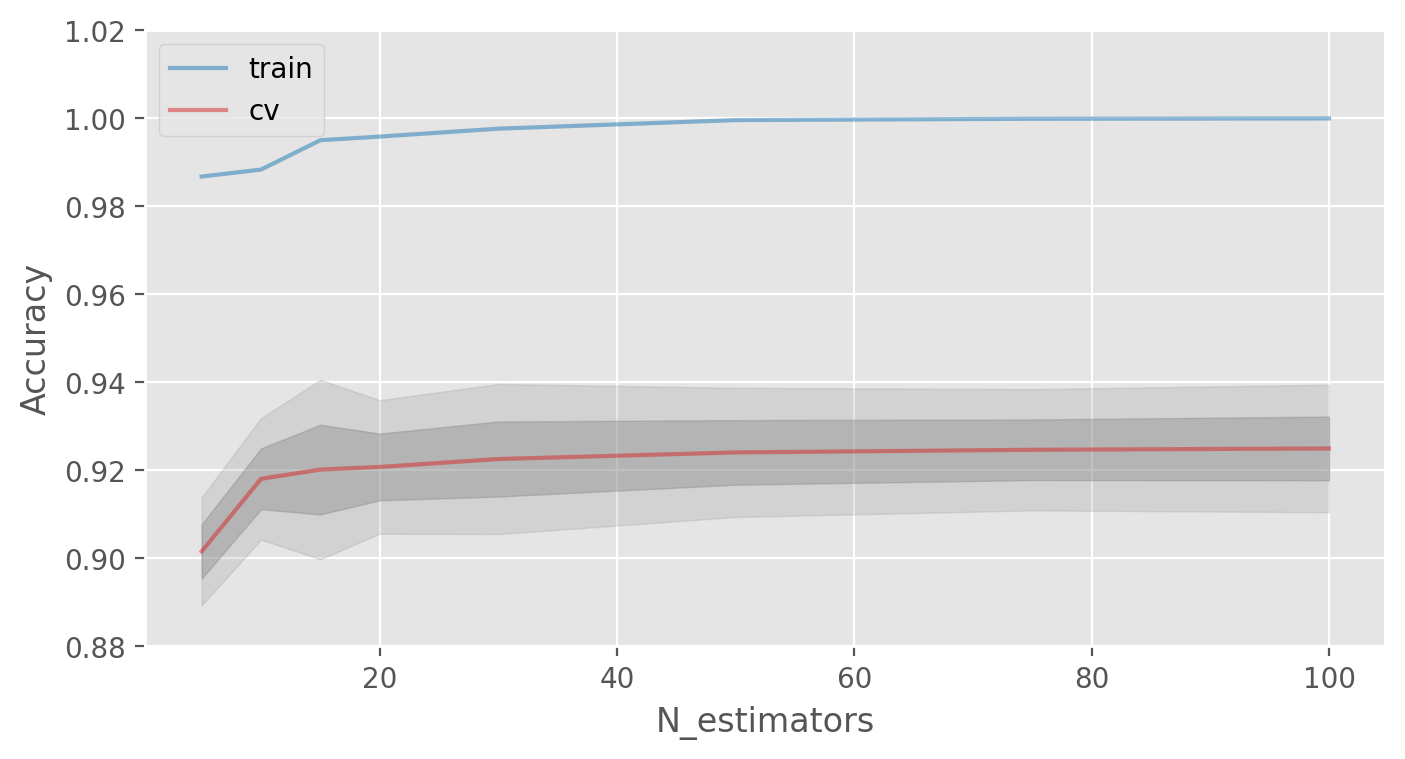

In [44]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    trees_grid,
    train_acc.mean(axis=1),
    alpha=0.5,
    color='tab:blue',
    label='train'
)
ax.plot(
    trees_grid,
    test_acc.mean(axis=1),
    alpha=0.5,
    color='tab:red',
    label='cv'
)
ax.fill_between(
    trees_grid,
    test_acc.mean(axis=1) - test_acc.std(axis=1),
    test_acc.mean(axis=1) + test_acc.std(axis=1),
    color='#888888',
    alpha=0.4
)
ax.fill_between(
    trees_grid,
    test_acc.mean(axis=1) - 2*test_acc.std(axis=1),
    test_acc.mean(axis=1) + 2*test_acc.std(axis=1),
    color='#888888',
    alpha=0.2
)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")
plt.plot();

As you can see, when a certain number of trees is reached, our accuracy on the test set is very close to the asymptote. You can decide by yourself which value would be the optimal number of trees for your problem.

The figures also show that we achieved 100% accuracy on the training set, which tells us that we overfit. In order to avoid overfitting, we need to add regularization parameters to our model.

We will start with the maximum depth of trees `max_depth` and fix the number of trees at 100:

In [45]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []

for max_depth in max_depth_grid:
    
    rfc = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=max_depth
    )
    
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        rfc.fit(X_train, y_train)
        
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
        
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc = np.asarray(train_acc)
test_acc = np.asarray(test_acc)

print(f"Best CV accuracy is {max(test_acc.mean(axis=1))*100:.2f}% with {max_depth_grid[np.argmax(test_acc.mean(axis=1))]} max_depth")

Best CV accuracy is 92.44% with 24 max_depth


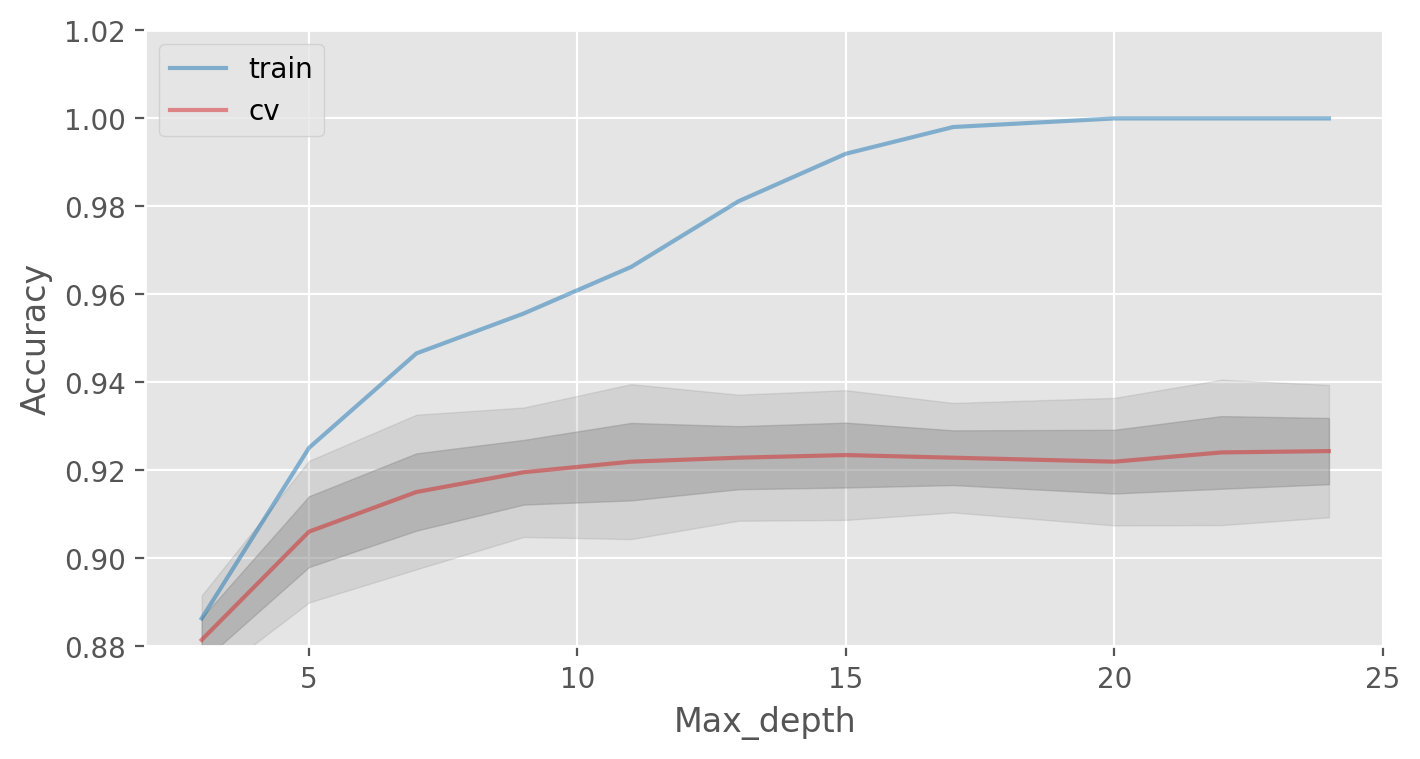

In [46]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    max_depth_grid,
    train_acc.mean(axis=1),
    alpha=0.5,
    color='tab:blue',
    label='train'
)
ax.plot(
    max_depth_grid,
    test_acc.mean(axis=1),
    alpha=0.5,
    color='tab:red',
    label='cv'
)
ax.fill_between(
    max_depth_grid,
    test_acc.mean(axis=1) - test_acc.std(axis=1),
    test_acc.mean(axis=1) + test_acc.std(axis=1),
    color='#888888',
    alpha=0.4
)
ax.fill_between(
    max_depth_grid,
    test_acc.mean(axis=1) - 2 * test_acc.std(axis=1),
    test_acc.mean(axis=1) + 2 * test_acc.std(axis=1),
    color='#888888',
    alpha=0.2
)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

Parameter `max_depth` copes well with the regularization of our model and it does not overfit as badly as before. The model accuracy has increased slightly.

Another important parameter worth tuning is `min_samples_leaf`. It also contributes to regularization.

In [47]:
# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                                 min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print(
    "Best CV accuracy is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100,
    min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))])
)

Best CV accuracy is 92.50% with 1 min_samples_leaf


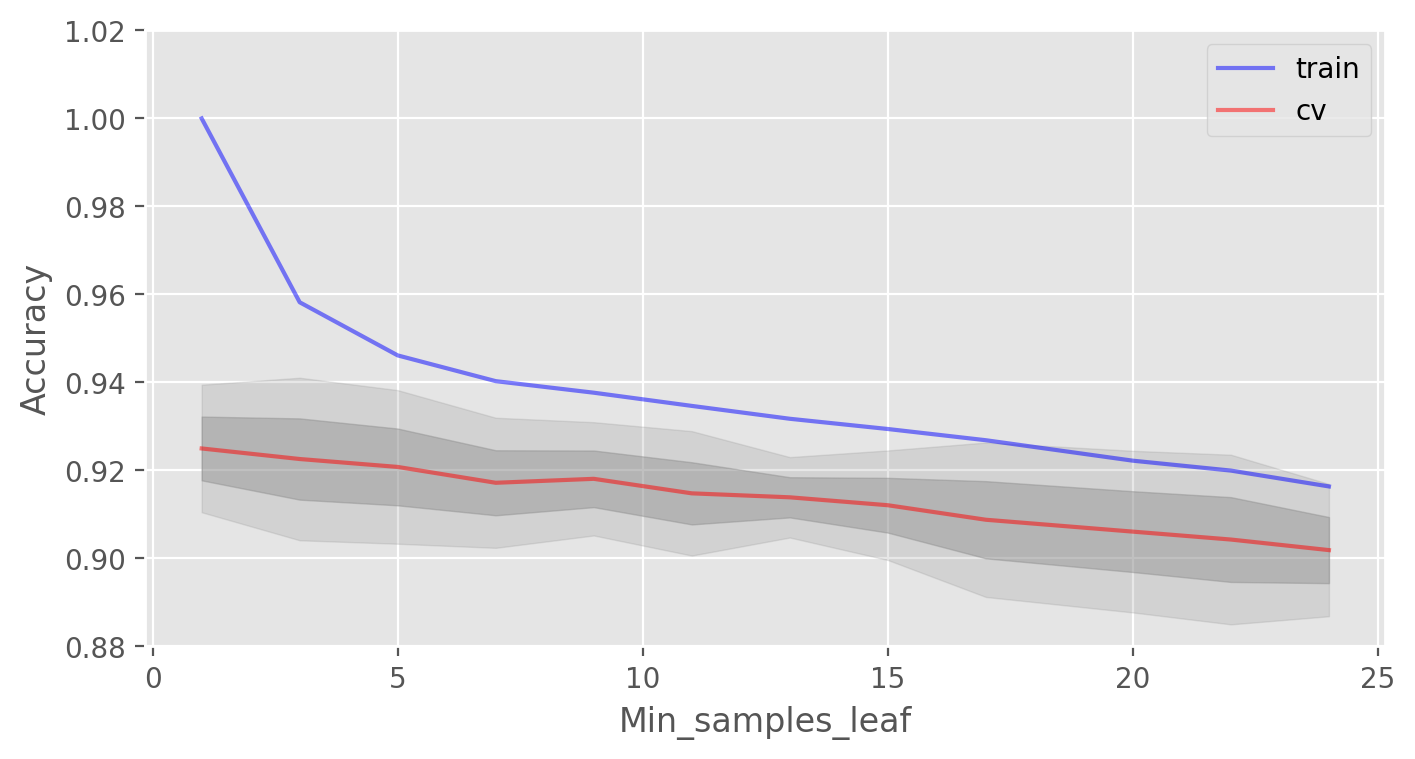

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1),
                test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1),
                test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

In this case, we do not see an improvement in accuracy on the validation set, but we significantly reduce the overfitting down to 2% while keeping the accuracy at about 92%.

Let’s consider the parameter `max_features`. For classification, the value 
$\sqrt{d}$ (the total number of features) is typically used as the default choice. Let’s check whether it would be optimal to use 4 features in our case:

Best CV accuracy is 92.50% with 4 max_features


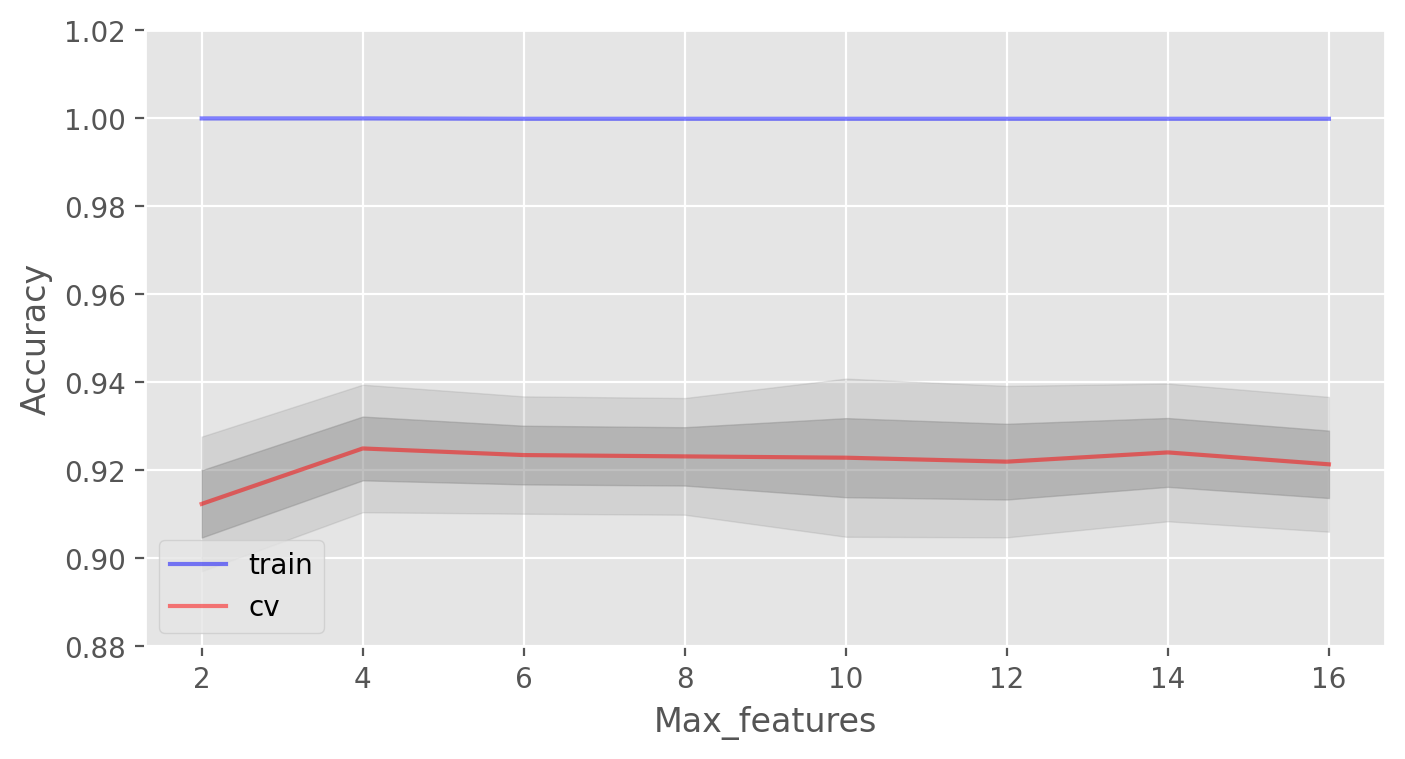

In [49]:
# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                                 max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best CV accuracy is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100,
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1),
                test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1),
                test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

In our case, the optimal number of features is equal to 10. This is the value at which the best result is achieved.

We have seen how the learning curves change with different values of the basic parameters. Now, let’s use `GridSearch` to find the optimal parameters for our example:

In [50]:
# Initialize the set of parameters for exhaustive search and fit
parameters = {'max_features': [4, 7, 10, 13],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_depth': [5, 10, 15, 20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [51]:
gcv.best_params_, gcv.best_score_

({'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 3},
 0.925596661128895)